In [1]:
## Classification regression Types : KNN (K Nearest neighbour), Logistic regression 
##(Its a binomial regression, i.e it predicts only 2 classes), Decision Tree, Random Forest and SVM (Support Vector Machine)

## In Sup Reg Types : Linear regression (Simple and Multiple), Ridge, Losso, Polynomial

## In supervised regression target variable or variable to be predicted is continuous dependent var/ data type.
## In classi.. regr.. var is categorical dependent data type
## Performed on structured or unstructured data



In [2]:
## KNN (K Nearest Neighbour) Classification: It classifies the data based on feature similarity and for that it uses KNN classifier.
## Classifies the data based on how it's neighbours are classified
### It learns using available data with the help of KNN model and uses that learning to classify new data

## Parameter tuning : chooisng the right value of K.
## sqrt(n): total number of data points
## Odd value of K is selected to avoid confusion between 2 classes of data

## To use KNN : Data should be : 1. Labeled (have answers) 2. Noise free 3. Small

## KNN is called 'lazy learner', because it learns one by one and it doesn't a discriminative function from training set

## Its a actually a Eucledian distance between 2 points in 2D space. d = sqrt((x-a)^2+(y-b)^2)
## More close the d , more feature matching i.e new data is compared with available data using above formula, closest the distance
## chances of answer is good are more. i.e how closely classes in training set resembles the class to be predicted
## d calculates the distance between new data point and each training point

## Other distances : Manhattan and Hamming


## KNN Regression uses the average of K's selected to predict the missing values


### Choosing K is based on 'error calculation method', if error in prediction of training data is less accordingly we will chose K.

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
data = pd.read_csv("C:/Users/Rushikesh/Desktop/Students.csv")

In [5]:
data

,JEEPRE,JEEMAINS,STATUS
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [6]:
data1 = data.copy()
data1.isnull().sum()

JEEPRE      0
JEEMAINS    0
STATUS      0
dtype: int64

In [7]:
data1.shape

(100, 3)

In [8]:
data1.describe()

,JEEPRE,JEEMAINS,STATUS
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [9]:
data1.dtypes

JEEPRE      float64
JEEMAINS    float64
STATUS        int64
dtype: object

In [10]:
## Dependent variable is staus

data1['STATUS'].value_counts()

STATUS
1    60
0    40
Name: count, dtype: int64

In [11]:
x = data1[['JEEPRE','JEEMAINS']]
y = data1['STATUS']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [14]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(80, 2) (20, 2)
(80,) (20,)


In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
clf = KNeighborsClassifier(n_neighbors=11)    #### n_neighbors=k..i have 3 as random correct method is sqrt(all rows or data points)
                                              ### from error method error is same for all i, i can chose any.

In [17]:
clf_fit = clf.fit(x_train, y_train)
clf_fit

KNeighborsClassifier(n_neighbors=11)

In [18]:
### Choosing the k
from math import sqrt
sqrt(data1.shape[0])         ## This gives me no. of data points and its sqrt.....k could be 9 or 11

10.0

In [19]:
pred_y_test = clf.predict(x_test)
pred_y_test

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1],
      dtype=int64)

In [20]:
y_test

64    0
11    0
69    1
41    0
29    0
55    0
58    1
9     1
83    1
1     0
88    1
85    1
43    0
25    1
28    0
35    0
27    0
8     1
53    0
94    1
Name: STATUS, dtype: int64

In [21]:
from sklearn.metrics import accuracy_score   ## only used for classification

In [22]:
accuracy_score(y_test, pred_y_test)     #### for k = 7, accu_score was 80%, now for k=1 score is 85%, for k=9, 11 score is 90%

0.85

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
confusion_matrix(y_test, pred_y_test)    #### Same as heatmap

array([[9, 2],
       [1, 8]], dtype=int64)

<Axes: >

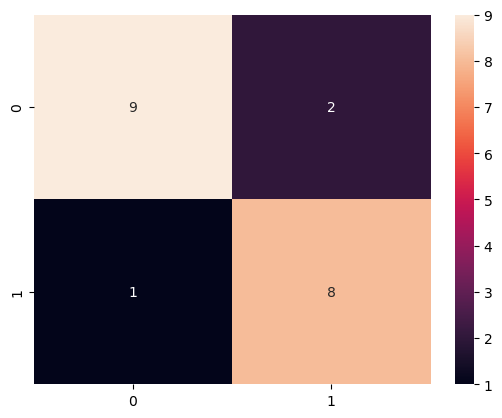

In [25]:
sns.heatmap(confusion_matrix(y_test, pred_y_test), annot = True)   ### It gives accuracy of prediction in number

In [26]:
### Another method for finding K , error method / Elbow method
#### we will get error for each k from 1 to 30. error = (1 - accuracy score(y_test, pred_y_test))

error = []                       ### we will append the errors in this empty list
for i in range(1,31):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train, y_train)
    pred1_y_test = clf.predict(x_test)
    error.append(1-accuracy_score(y_test, pred_y_test))      ### for append we need to import numpy
    

In [27]:
error     ### error is same for all values of i...so i can chose any value of i for k. but ideally we should chose 
              ###whichever ID is least as k. if 7th position error is least i will chose k = 7
    
### choosing good value of k is very important for minimum error and good accuracy

[0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002]

In [28]:
import matplotlib.pyplot as plt

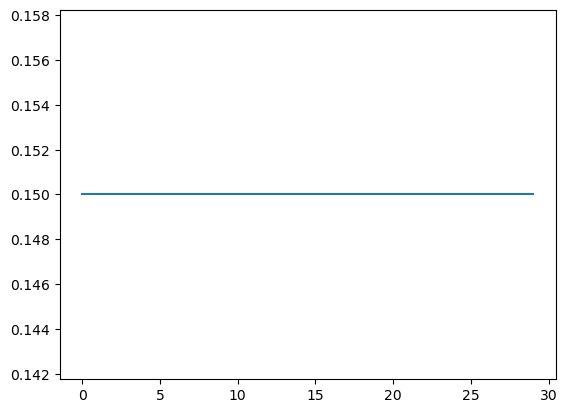

In [29]:
plt.plot(error)

In [30]:
# dt = pd.read_csv("C:/Users/Rushikesh/Desktop/geyser.csv")
# dt

dt = sns.load_dataset('iris')    ### KNN Classification using seaborn inbuilt package iris.
dt

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [34]:
dt['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [62]:
x = dt[['sepal_length','sepal_width','petal_length','petal_width']]
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [61]:
y = dt['species']
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [53]:
dt.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [54]:
dt['species'].shape

(150,)

In [63]:
x_train, y_train, x_test, y_test = train_test_split(x,y, train_size= 0.8)

In [64]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


In [58]:
### Finding the K using sqrt(n) method

sqrt(dt.shape[0])    ### k can be 11 or 13...least chose 11

12.24744871391589

In [65]:
clasf = KNeighborsClassifier(n_neighbors=13)
clas_fit = clasf.fit(x_train, y_train)    ### Getting a error in this line.
class_fit

ValueError: Found input variables with inconsistent numbers of samples: [120, 30]

In [ ]:
##### Logistics Regression
## It is performed when dependent variable is dichotomous (binary). Type of predictive analysis.
##Goal is to find a relation between dependent or target variable and set of independent variables.
## Better than KNN since it quantitatively explains factors leading to classification.
## It used Sigmoid function in order to map predicted values to probabilities. probability is between 0 and 1.
## SF is S shaped curve with + values are above (0,0) i.e 0.5 and negavtive values are below (0,0) i.e 0.5

## Confusion matrix
## True positivies : Predicted yes, actually yes
## True negavtives : No, no
## False positives : Yes, no (Type I error)
## False negatives : No, yes  (Type II error)

## Accuracy : (TP+TN)/Total
## Misclassification rate : (FP+FN)/Total = (1-Accuracy) : Error rate